In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

[Dataset](#section_dataset)

[Imports](#section_imports)

[Estilos](#section_estilos)

[Matplotlib en notebooks](#section_mpl_notebooks)

[Creación de gráficos](#section_creacion)

$\hspace{.5cm}$[`plt.Figure`](#section_plt.Figure)

$\hspace{.5cm}$[`plt.Axes`](#section_plt.Axes)

[Grilla vacía](#section_grilla_vacia)

[Gráficos de linea](#section_graficos_linea)

$\hspace{.5cm}$[Ajustes de color y estilos](#section_ajuste_color_estilos)
    
$\hspace{.5cm}$[Ajustes de ejes](#section_ajuste_ejes)
    
$\hspace{.5cm}$[Etiquetas](#section_etiquetas)
    
[Scatter Plots](#section_scatter_plots)

[Histogramas](#section_histograms)

[Subplots](#section_subplots)

[rcParams](#section_rcParams)

[Ejercicio](#section_ejercicio)

[Referencias](#section_referencias)


<a id="section_intro"></a> 
## Intro

[volver a TOC](#section_toc)

Matplotlib es una biblioteca para visualización de datos construída sobre Numpy arrays y diseñada para trabajar con todo el ecosistema SciPy (https://www.scipy.org/).

https://matplotlib.org/

El objetivo de esta práctica es que entendamos la lógica de construcción de gráficos con matplotlib usando Figure y Axes, y veamos algunos de los métodos que modifican textos y ejes. Después de esta práctica, vamos a estar en condiciones de entender el código y aplicar en nuestros análisis una gran variedad de ejemplos de visualizaciones que se presentan en la documentación de esta biblioteca.

![Image](img/matplotlib_anatomy.png)


<a id="section_dataset"></a> 
## Dataset

[volver a TOC](#section_toc)

En esta práctica guiada usaremos datos generados.

Para eso, vamos a crear un numpy array con 100 números entre 0 y 10 usando el método `linspace` de `numpy` y a partir de esos datos crearemos dos nuevos numpy array, uno con el seno de esos datos y otro con el coseno.

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

Usaremos estos datos para presentar los comandos básicos de matplotlib.


In [1]:
import numpy as np
data_x = np.linspace(0, 10, 100)

data_sin = np.sin(data_x)
data_cos = np.cos(data_x)

data_normal_1 = np.random.normal(0, 0.8, 1000)
data_normal_2 = np.random.normal(-2, 1, 1000)
data_normal_3 = np.random.normal(3, 2, 1000)

<a id="section_imports"></a> 
## Imports
[volver a TOC](#section_toc)


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<a id="section_estilos"></a> 
## Estilos
[volver a TOC](#section_toc)


El paquete de estilos brinda soporta para cambiar fácilmente el estilo de gráfico creado, usando los mismos parámetros que un archivo rc (que es el archivo de configuración de matplotlib leído cuando se inicia).

Matplotlib provee algunos estilos predefinidos. 

Podemos ver ejemplos de los estilos disponibles en este link https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

https://matplotlib.org/tutorials/introductory/customizing.html

Para listar los estilos disponibles usamos: 

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Para setear el estilo 'classic' escribimos:

In [4]:
plt.style.use('classic')

<a id="section_mpl_notebooks"></a> 
##  Matplotlib en notebooks
[volver a TOC](#section_toc)


Para visualizar los gráficos creados con matplotlib tenemos dos opciones:

* `%matplotlib inline` muestra los gráficos debajo de la celda de código ejecutada.

* `plt.show()` muestra **el último** gráfico creado, independientemente de la ubicación de la celda.

Nosotros vamos a usar la primera opción `%matplotlib inline`. Después de ejecutar este comando (que es necesario sólo una vez por kernel / sesión) cualquier celda dentro de la notebook que cree un gráfico, mostrará debajo la imagen resultado.

<a id="section_creacion"></a> 
## Creación de gráficos
[volver a TOC](#section_toc)


Para todos los gráficos de matplotlib, comenzaremos creando una figura y sus axes. 

<a id="section_plt.Figure"></a> 
### `plt.Figure`

La figura, una instancia de la clase plt.Figure, puede pensarse como un contenedor de todos los objetos que representan axes, gráficos, textos y etiquetas.

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure

Para crear una figura (instancia de `plt.Figure`) usamos el método `plt.figure()`

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html

<a id="section_plt.Axes"></a> 
### `plt.Axes`

Los axes, una instancia de la clase plt.Axes, están compuestos por un cuadro que delimita y eventualmente contendrá el elemento plot con nuestra visualización, ticks y etiquetas, . 

https://matplotlib.org/3.2.1/api/axes_api.html#matplotlib.axes.Axes

Para crear un objeto axes (instancia de `plt.Axes`) usamos el método `plt.axes()`

Una vez que creamos la instancia de axes, usamos el método `ax.plot` para graficar los datos.

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot

<a id="section_grilla_vacia"></a> 
## Grilla vacía
[volver a TOC](#section_toc)


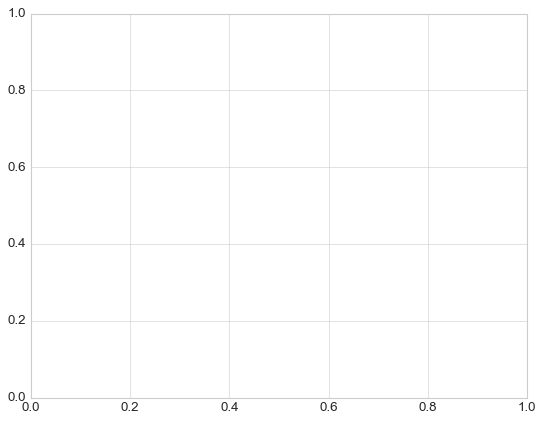

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

<a id="section_graficos_linea"></a> 
## Gráficos de linea
[volver a TOC](#section_toc)

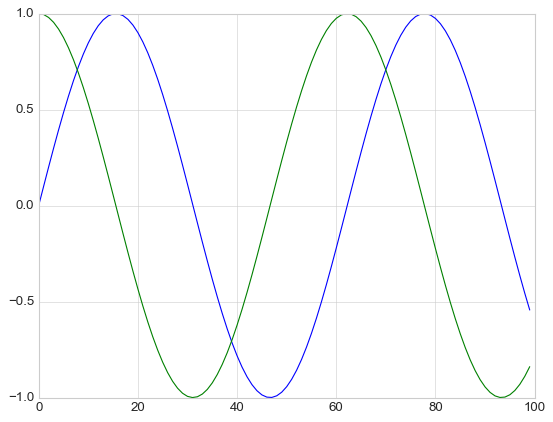

In [7]:
#creo la figura
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
#ax.plot(data_x, data_sin);
ax.plot(data_sin);
# superpongo otro gráfico en axes:
#ax.plot(data_x, data_cos);
ax.plot(data_cos);

<a id="section_ajuste_color_estilos"></a> 
### Ajustes de color y estilos
[volver a TOC](#section_toc)


El método `plot` toma argumentos adicionales que pueden usarse para especificar color y estilo de linea.

#### Alternativas para especificar color:

`color = 'blue'` especificamos el color por nombre

`color = 'g'` código de color corto (rgbcmyk)

`color = '0.75'` escala de grises entre 0 y 1

`color = '#FFDD44'` código hexa (RRGGBB) desde 00 hasta FF

`color = (1.0, 0.2, 0.3)` tupla RGB valores entre 0 y 1

#### Alternativas para especificar estilo de linea:

`linestyle = 'solid'` o `linestyle = '-'`  linea continua

`linestyle = 'dashed'` o `linestyle = '--'` linea de trazos

`linestyle = 'dashdot'` o `linestyle = '-.'` linea compuesta (punto y segmento)

`linestyle = 'dotted'` o `linestyle = ':'` linea punteada

#### Combinaciones para especificar estilo de linea y color simultaneamente:

`'-g'` linea continua verde

`'--c'` linea de trazon cyan

`'-.k'` linea compuesta negra

`':r'` linea punteadad roja

En los puntos que siguen vamos a probar distintos atributos sobre un mismo gráfico. Para no rescribir el código de creación de ese gráfico cada vez que probemos un nuevo atributo, vamos a definir una función que nos devuelva este gráfico "base" que vamos a reutilizar.

In [8]:
def base_matplotlib_example():
    # creo al figura
    fig = plt.figure()
    # creo los axes
    ax = plt.axes()
    # dibujo en axes:
    ax.plot(data_x, data_sin, color = '0.75', linestyle = 'dashed', label='serie sin');
    # superpongo otro gráfico en axes:
    ax.plot(data_x, data_cos, color = (1.0, 0.2, 0.3), linestyle = 'dotted', label='serie cos');
    # superpongo otro gráfico en axes:
    ax.plot(data_x, (data_cos+1), '-g', label='serie cos modif')
    return fig, ax

#nota:
# agrego label a los métodos plot para poder armar la leyenda de referencia después

Veamos como crearlo, invocando la función que definimos:

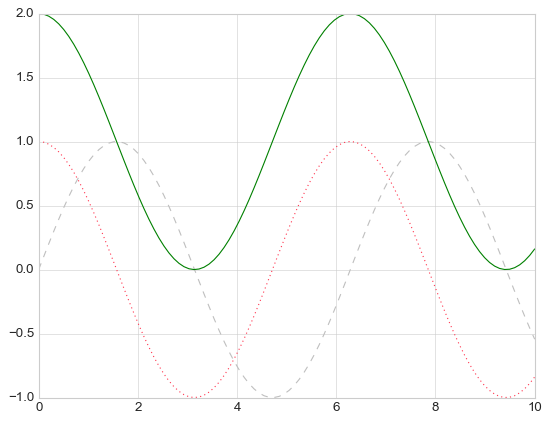

In [9]:
fig, ax = base_matplotlib_example()

<a id="section_ajuste_ejes"></a> 
### Ajustes de ejes
[volver a TOC](#section_toc)

Podemos definir qué valores mínimo y máximo se representan en los ejes x e y.

Eje x, `set_xlim`
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html#matplotlib.axes.Axes.set_xlim

Eje y, `set_ylim`
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_ylim.html#matplotlib.axes.Axes.set_ylim

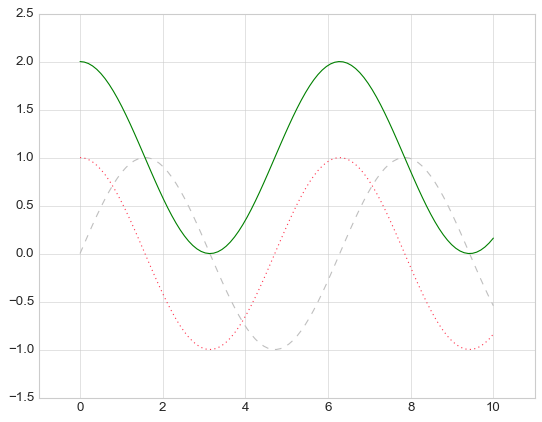

In [10]:
fig1, ax1 = base_matplotlib_example()

# el eje x ira de -1 a 11
ax1.set_xlim(-1, 11)    

# el eje y ira de -1.5 a 2.5
ax1.set_ylim(-1.5, 2.5); 
    

Podemos setear valores de los ejes que ajusten a los datos usando 'tight'

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axis.html#matplotlib.axes.Axes.axis

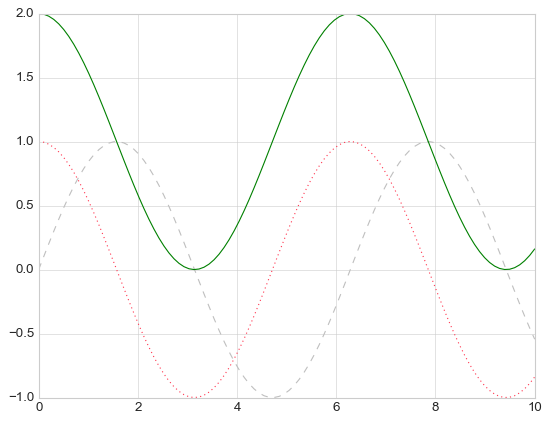

In [11]:
fig2, ax2 = base_matplotlib_example()
ax2.axis = 'tight'

<a id="section_etiquetas"></a> 
### Etiquetas
[volver a TOC](#section_toc)


#### Títulos de figuras y axes
Veamos como establecer etiquetas para títulos, ejes y leyendas.

##### `Figure.suptitle`
Establece el título de la figura
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.suptitle

##### `Axes.set` 
Establece el título de los ejes y del plot, tamaño de los ejes
* xlabel
* ylabel
* title
* xlim
* ylim

#### Leyenda

##### `Axes.legend` 
Podemos agregar la leyenda de referencias, usando como etiquetas el valor del argumento `label` que seteamos en el método `plot`, o establecerlas después explícitamente.
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.legend.html

###### Usando el valor del argumento `label` que seteamos en el método `plot`:

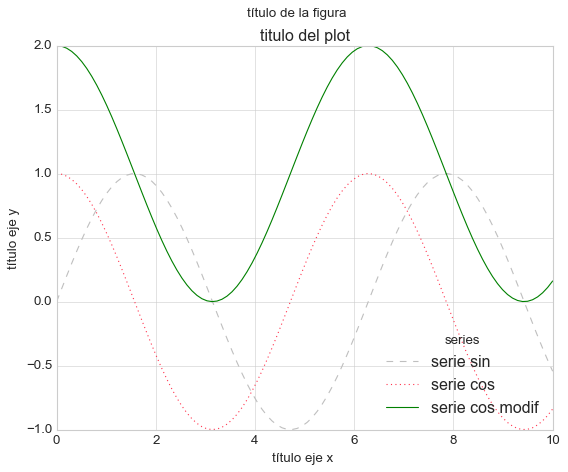

In [12]:
fig3, ax3 = base_matplotlib_example()
fig3.suptitle("título de la figura") 
ax3.set(xlabel = "título eje x ", ylabel = "título eje y", title = "titulo del plot")
# usa los valores de label que seteamos en plot:
ax3.legend(loc='lower right', title = "series");

###### Estableciendo explícitamnete los valores de las etiquetas:

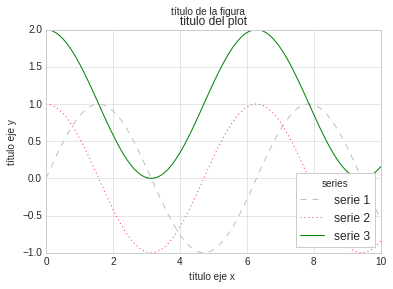

In [13]:
fig3, ax3 = base_matplotlib_example()
fig3.suptitle("título de la figura") 
ax3.set(xlabel = "título eje x ", ylabel = "título eje y", title = "titulo del plot")
# especificamos etiquetas para cada serie:
etiquetas = ['serie 1', 'serie 2', 'serie 3'] 
ax3.legend(etiquetas, loc='lower right', title = "series", frameon=True);

Si queremos cambiar la ubicación de la leyenda usamos el argumento `loc` del método `legend`. 

Los valores posibles del argumento son:

`'best'`

`'upper right'`

`'upper left'`

`'lower left'`

`'lower right'`

`'right'`

`'center left'`

`'center right'`

`'lower center'`

`'upper center'`

`'center'`

Podemos dibujar una caja alrededor de la leyenda estableciendo el valor del argumento `frameon` como vimos arriba en esta linea:

`ax3.legend(etiquetas, loc='lower right', title = "series", frameon=True);`

<a id="section_scatter_plots"></a> 
## Scatter Plots
[volver a TOC](#section_toc)

Son similares a los gráficos de linea pero cada punto queda representado individualmente por un símbolo, en lugar de unirlos por segmentos. 


### `scatter`

El argumento marker define el estilo del símbolo que representa cada punto. Puede ser una instancia de la clase MarkerStyle o un string que representa un símbolo particular.

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.scatter.html

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.markers.MarkerStyle.html

El argumento alpha define el nivel de trasparencia de los markers. Es un valor numérico entre 0 (transparente) y 1 (opaco).


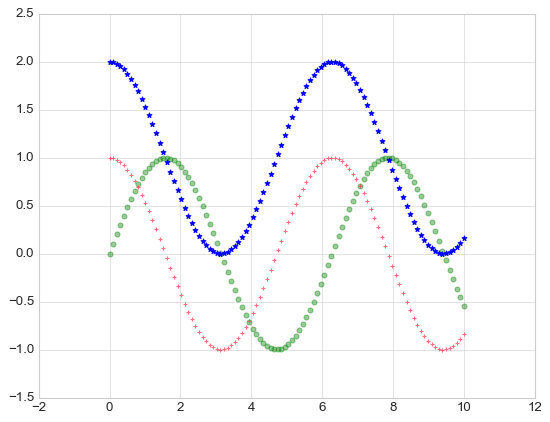

In [13]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(data_x, data_sin, marker = 'o', color = "green", label='serie sin', alpha = 0.4)
# superpongo otro gráfico en axes:
ax.scatter(data_x, data_cos, marker = '+', color = (1.0, 0.2, 0.3), label='serie cos', alpha = 0.7);
# superpongo otro gráfico en axes:
ax.scatter(data_x, (data_cos+1), marker='*', color = "blue", label='serie cos modif', alpha = 1)



<a id="section_histograms"></a> 
## Histogramas
[volver a TOC](#section_toc)


### `hist`

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html

Entre los parámetros que podemos establecer para un histograma están:

`bins`: entero, lista o string. 

* Si es un entero define la cantidad de bins (barras) de igual ancho en el rango de valores del gráfico. 

* Si es una lista, define los límites de cada barra incluyendo el límite izquierdo del primer bin y el límite derecho del último bin. En este caso, pueden ser de anchos distintos.

* Si es un string, representa una de las estrategias que soporta numpy.histogram_bin_edges: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt'.

`density`: booleano. Si es True, los pesos están normalizados tal que la integral de la densidad en el rango vale 1.

`histtype`: string. Tipo de histograma a graficar. Los valores posibles son {'bar', 'barstacked', 'step', 'stepfilled'}

* 'bar' representa un histograma tradicional

* 'barstacked' representa un histograma de barras apiladas

* 'step' genera un gráfico de lineas que por default no tiene relleno

* 'stepfilled' genera un gráfico de lineas que por default tiene relleno

`color`: color que toman las barras del histograma

`edgecolor`: color que toman los bordes de las barras del histograma

`alpha`: decimal de valor entre 0 y 1 que representa el nivel de transparecia, 0 es transparente y 1 es opaco


(array([  8.,  15.,  56., 136., 198., 228., 212., 108.,  36.,   3.]),
 array([-3.81238448, -2.53314232, -1.25390016,  0.025342  ,  1.30458416,
         2.58382632,  3.86306848,  5.14231064,  6.4215528 ,  7.70079496,
         8.98003712]),
 <BarContainer object of 10 artists>)

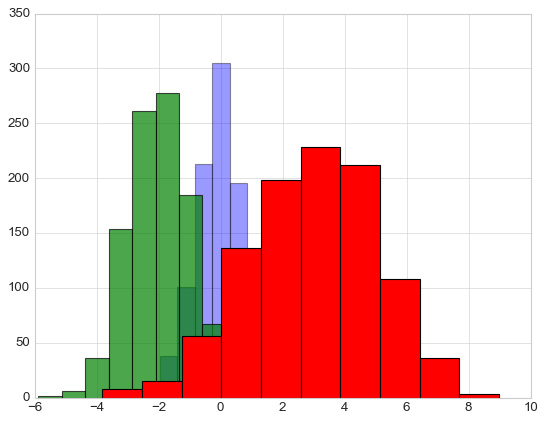

In [14]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.hist(data_normal_1, label='data normal 1', alpha = 0.4)
# superpongo otro gráfico en axes:
ax.hist(data_normal_2, label='data normal 2', alpha = 0.7);
# superpongo otro gráfico en axes:
ax.hist(data_normal_3, label='data normal 3', alpha = 1)


Si vamos a establecer los mismo valores un conjunto de los parámetros en todos los histogramas que componen el gráfico, es conveniente definir un diccionario con estos valores, y pasarlo como parámetro en todas las llamadas al métodos hist, en lugar de establecer cada uno de los valores de los argumentos para cada uno de los histogramas.

Vamos a establecer los valores de histtype, alpha, density, y bins en un diccionario y luego repetir el gráfico anterior

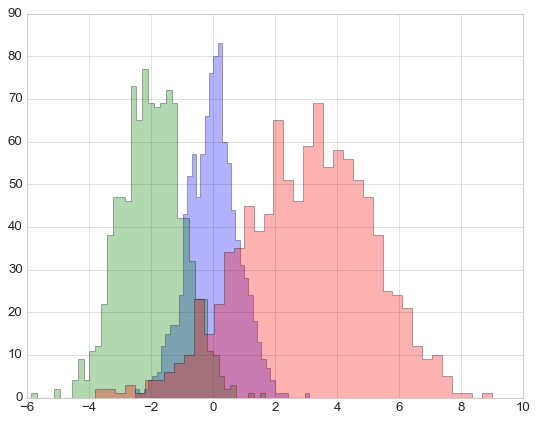

In [22]:
kwargs = { 'histtype': 'stepfilled', 
          'alpha': 0.3, 
          'density': False, 
          'bins': 40}

fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.hist(data_normal_1, label='data normal 1', **kwargs)
# superpongo otro gráfico en axes:
ax.hist(data_normal_2, label='data normal 2', **kwargs)
# superpongo otro gráfico en axes:
ax.hist(data_normal_3, label='data normal 3', **kwargs);


<a id="section_subplots"></a> 
## Subplots
[volver a TOC](#section_toc)

`plt.subplots` crea una grilla de subplots, devolviéndolos en una insatncia de numpy array.

Los argumentos que recibe son el número de filas y el número de columnas, y dos argumentos opcionales (sharex y sharey) que permite espcificar la relación entre los ejes.

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html

### Grilla vacía

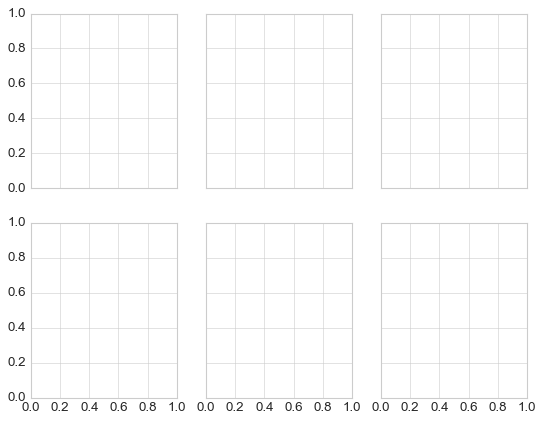

In [23]:
fig, ax = plt.subplots(2, 3, sharex = 'col', sharey = 'row')

In [24]:
print(ax.shape)
print(type(ax))

(2, 3)
<class 'numpy.ndarray'>


Vamos a graficar algunos histogramas, scatter plot, y gráficos de linea  en los elementos de la grilla que creamos.

Con `plt.subplots` creamos un numpy array de Axes, luego indexamos cada uno de esos elementos y graficamos los elementos individuales en la forma que aprendimos a lo largo de esta práctica.

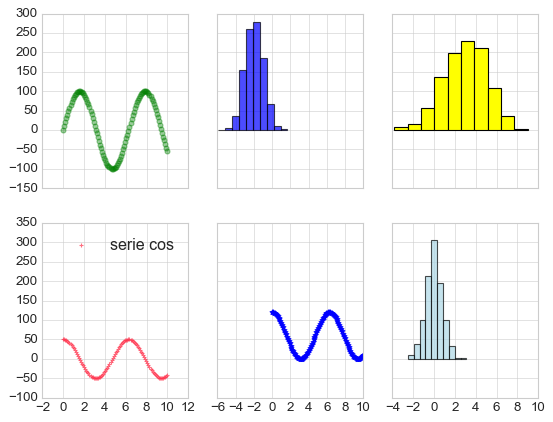

In [25]:
fig, ax = plt.subplots(2, 3, sharex = 'col', sharey = 'row')

ax[0, 0].scatter(data_x, 100*data_sin, marker = 'o', color = "green", label='serie sin', alpha = 0.4)

ax[0, 1].hist(data_normal_2, label='data normal 2', alpha = 0.7);

ax[0, 2].hist(data_normal_3, label='data normal 3', alpha = 1, color = "yellow")

ax[1, 0].scatter(data_x, 50*data_cos, marker = '+', color = (1.0, 0.2, 0.3), label='serie cos', alpha = 0.7)

ax[1, 1].scatter(data_x, 60*(data_cos+1), marker='*', color = "blue", label='serie cos modif', alpha = 1)

ax[1, 2].hist(data_normal_1, label='data normal 1', alpha = 0.7, color = "lightblue")

ax[1, 0].legend();



<a id="section_rcParams"></a> 
## rcParams
[volver a TOC](#section_toc)

Como mencionamos en la parte de estilos, un archivo rc contiene la configuración de matplotlib leída cuando se inicia.

Cada vez que se inicia matplotlib, se define una configuración de runtime (rc) que contiene los estilos default para cada elemento plot que creemos. Podemos ajustar esta configuración modificando los valores de `plt.rc`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html

A continaución, vamos a ver un ejemplo de cómo modificar los valores de `rc`. Antes de comenzar hacemos una copia de los valores de rcParams que guardamos en la variable rc_default, para poder restablecerlos después.

In [26]:
# hacemos un backup de los valores actuales de rc
rc_default = plt.rcParams.copy()

#cambiamos algunos valores
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)


Graficamos un histograma con los settings correspondientes a los valores de rcParams modificados.

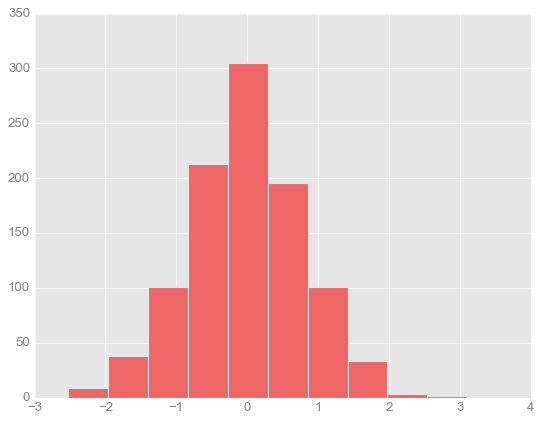

In [27]:
fig_rcModified = plt.figure()
ax_rcModified = plt.axes()

ax_rcModified.hist(data_normal_1);

Restauramos los valores originales de rcParams que guardamos al comienzo en la variable rc_default

In [28]:
# quitamos algunos de los parámetos de rc_default porque se van a quietar en Matplotlib 3.3 y si están imprime un warning:

to_remove = ["animation.avconv_path", "animation.avconv_args", "animation.html_args",
            "keymap.all_axes", "savefig.jpeg_quality", "text.latex.preview"]

for to_remove_key in to_remove:
    if to_remove_key in rc_default.keys():
        print(rc_default[to_remove_key])
        del rc_default[to_remove_key]
    

avconv
[]
[]
['a']
95
False


In [29]:
# otra forma de ghacer restore de los valores originales
plt.rcParams.update(rc_default);

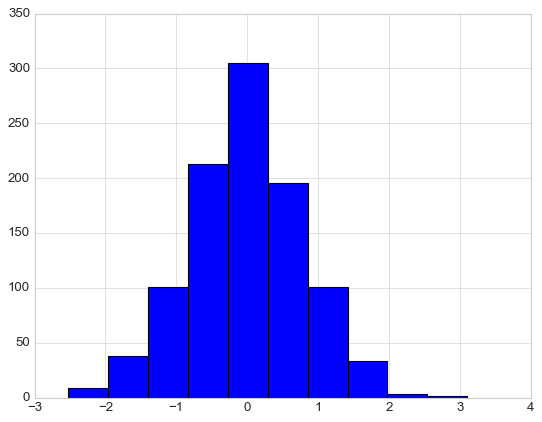

In [30]:
fig_restore = plt.figure()
ax_restore = plt.axes()

ax_restore.hist(data_normal_1);


Si queremos restaurar los valores de rcParams a los default de matplotlib usamos

In [25]:
# restore defaults: 
mpl.rcdefaults()

---
<a id="section_ejercicio"></a> 
## Ejercicio
[volver a TOC](#section_toc)


Usando algún dataset de los que analizamos hasta el momento, elijamos tres columnas e intentemos extraer conclusiones sobre los datos o sus relaciones usando visualizaciones creadas con matplotlib.

Si les interesa usar otro dataset que no hayamos usado, también pueden hacerlo.


---


<a id="section_referencias"></a> 
## Referencias
[volver a TOC](#section_toc)


Python Data Science Handbook. Jake VanderPlas. 2017. Capítulo 4.

Código del libro (puede ejecutarse en Colab) https://github.com/jakevdp/PythonDataScienceHandbook

Ejemplos con código 
https://matplotlib.org/3.1.1/gallery/index.html